# Introduction
This file contains code for all the analysis conducted for the paper "Self-Defense Regulations and Crime: Evidence from the Stand Your Ground Law".

### Imports
Below are all the packages needed for the project.

In [2]:
# plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

# numerical computations
import numpy as np

# Data manipulation
import pandas as pd
import pyreadstat
# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# advanced plotting, such as interactive graphs
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

# advanced plotting, such as multi-frame plots
import seaborn as sns

# Two sample T tests
from scipy.stats import ttest_ind

# Pre-Processing

## Separate Data to Planned and Unplanned

#### Make Dictionary (Circum_Cases vs Circum_SHR)

In [26]:
df_circum_dict = pd.DataFrame(np.array([['a01', 3], # a01: Homicide committed with another felony
                                                    #  Felony-murder
                                                    #  Robbery
                                                    # 3: Robbery
                                       ['a02', 5],  # a02: Homicide committed with another felony
                                                    #  Felony-murder
                                                    #  Burglary
                                                    # 5: Burglary
                                       ['a03', 2],  # a03: Homicide committed with another felony
                                                    #  Felony-murder
                                                    #  Sexual assault
                                                    # 2: Rape
                                        ['a04', 9], # a04: Homicide committed with another felony
                                                    #  Felony-murder
                                                    #  Arson
                                                    # 9: Arson
                                        ['a09', 17],# a09: Homicide committed with another felony
                                                    #  Other felony
                                                    #  Other sex offense
                                                    # 17: Other sex offense
                                        ['a07', 6], # a07: Homicide committed with another felony
                                                    #  Other felony
                                                    #  Larceny
                                                    # 6: Larceny
                                        ['a08', 7], # a08: Homicide committed with another felony
                                                    #  Other felony
                                                    #  Auto theft
                                                    # 7: Motor vehicle theft
                                        ['a10', 3], # a10: Homicide committed with another felony -> 
                                                    #  Other felony -> Homosexual prostitution (PRETEXT FOR ROBBERY)
                                                    # 3: Robbery
                                        ['a11', 3],# a11: Homicide committed with another felony ->
                                                    #  Other felony -> Heterosexual prostitution (PRETEXT FOR ROBBERY)
                                                    # 3: Robbery
                                        ['b03', 45],# b03: Issue Oriented Dispute - Drugs (users dispute over drugs or paraphernalia);
                                                    # 45 - Other arguments
                                        ['b02', 44],# b02: Issue Oriented Dispute - Property/money
                                                    # 44 - Argument over money or property
                                        ['b01', 40],# b01: Issue Oriented Dispute
                                                    #  Romantic triangle
                                                    # 40: Lovers triangle
                                        ['a12', 26],# a12: Homicide committed with another felony
                                                    #  Other felony
                                                    #  Other
                                                    # 26: Other - not specified
                                        ['d30', 42],# d30: Situational Disputes
                                                    #  Barroom dispute/brawl
                                                    # 42: Brawl due to influence of alcohol
                                        ['d32', 19],# d32: Situational Disputes
                                                    #  Illegitimate recreation (gambling, cock fighting, etc.)
                                                    # 19: Gambling
                                        ['d33', 43],# d33: Situational Disputs
                                                    #  Illegitimate recreation (drugs)
                                                    # 43: Brawl due to influence of narcotics
                                        ['e01', 46],# e01: Homicide by-product of criminal business activity -> Turf battle
                                                    # 46: Gangland killings
                                        ['e02', 18],# e02: Homicide by-product of criminal business activity -> Bad deal/bad drugs
                                                    # 18: Gangland killings
                                        ['e03', 46],# e03: Homicide by-product of criminal business activity -> Money owed
                                                    # 46: Gangland killings
                                        ['e04', 46],# e04: Homicide by-product of criminal business activity -> Revenge for acting as police informant
                                                    # 46: Gangland killings
                                        ['e05', 46],# e05: Homicide by-product of criminal business activity -> Punishment for skimming drugs/money
                                                    # 46: Gangland killings
                                        ['e06', 46],# e06: Homicide by-product of criminal business activity -> Stealing drugs/drug money
                                                    # 46: Gangland killings
                                        ['e07', 46],# e07: Homicide by-product of criminal business activity -> Dispute over drugs
                                                    # 46: Gangland killings
                                        ['e08', 18],# e08: Homicide by-product of criminal business activity -> Drug manufacture
                                                    # 18: Narcotic drug laws
                                        ['e09', 18],# e09: Homicide by-product of criminal business activity -> Drug purchase/sale scam
                                                    # 18: Narcotic drug laws
                                        ['e10', 46],# e10: Homicide by-product of criminal business activity -> One of the above but can't distinguish
                                                    # 46: Gangland killings
                                        ['e11', 46],# e11: Homicide by-product of criminal business activity -> Punishment for stealing drugs/money
                                                    # 46: Gangland killings
                                        ['e12', 46],# e12: Homicide by-product of criminal business activity -> $ owed for crack house rent
                                                    # 46: Gangland killings
                                        ['e13', 46],# e13: Homicide by-product of criminal business activity -> Sex for drugs
                                                    # 46: Gangland killings
                                        ['e14', 46],# e14: Homicide by-product of criminal business activity -> Argument re drug house ops
                                                    # 46: Gangland killings
                                        ['e19', 46],# e19: Homicide by-product of criminal business activity -> Other-,drug business
                                                    # 46: Gangland killings
                                        ['e20', 46],# e19: Homicide by-product of criminal business activity -> Suspected drug business
                                                    # 46: Gangland killings
                                        ['e30', 10],# e30: Homicide by-product of criminal business activity -> Prostitution
                                                    # 10: Prostitution and commercialized vice
                                        ['e39', 10],# e39: Homicide by-product of criminal business activity -> Other
                                                    # 10: Prostitution and commercialized vice
                                        ['e40', 10],# e40: Homicide by-product of criminal business activity -> Suspected other criminal business
                                                    # 10: Prostitution and commercialized vice
                                        ['a13', 70],# a13: Homicide committed with another felony
                                                    #  Other felony
                                                    #  Suspected felony
                                                    # 70: All suspected felony type
                                        ['f01', 47],# f01: Homicide involved "juvenile" organized gangs
                                                    #  Turf battle between rival gangs
                                                    # 47: Juvenile gang killings
                                        ['f02', 47],# f02: Homicide involved "juvenile" organized gangs
                                                    #  Other gang fight between rival gang members
                                                    # 47: Juvenile gang killings
                                        ['f03', 47],# f03: Homicide involved "juvenile" organized gangs
                                                    #  Gang fight between members of same gang
                                                    # 47: Juvenile gang killings
                                        ['f04', 47],# f04: Homicide involved "juvenile" organized gangs
                                                    #  Drive-by shooting
                                                    # 47: Juvenile gang killings
                                        ['f05', 47],# f05: Homicide involved "juvenile" organized gangs
                                                    #  One of the above but can't distinguish
                                                    # 47: Juvenile gang killings
                                        ['f19', 47],# f06: Homicide involved "juvenile" organized gangs
                                                    #  One of the above but can't distinguish
                                                    # 47: Juvenile gang killings
                                        ['f20', 47],# f07: Homicide involved "juvenile" organized gangs
                                                    #  Suspected gang activities
                                                    # 47: Juvenile gang killings
                                        ['g01', 41],# g01: Miscellaneous
                                                    #  Child abuse
                                                    # 41: Child killed by babysitter
                                        ['g09', 49],# g09: Miscellaneous
                                                    #  Sniper
                                                    # 49: Sniper attack
                                        ['g03', 50],# g03: Miscellaneous
                                                    #  Gun/weapon accident
                                                    # 50: Victim shot in hunting accident
                                        ['g08', 80],# g08: Miscellaneous
                                                    #  Justifiable homicide by civilian
                                                    # 80: Felon killed by private citizen
                                        ['g07', 81],# g07: Miscellaneous
                                                    #  Justifiable homicide by police officer
                                                    # 81: Felon killed by police
                                        ['g03', 51],# g03: Miscellaneous
                                                    #  Gun/weapon accident
                                                    # 51: Gun-cleaning death - other than self
                                        ['g03', 52],# g03: Miscellaneous
                                                    #  Gun/weapon accident
                                                    # 52: Children playing with gun
                                        ['g03', 53],# g03: Miscellaneous
                                                    #  Gun/weapon accident
                                                    # 53: Other negligent handling of gun
                                        ['g11', 99],# g11: Miscellaneous
                                                    #  Unknown circumstance
                                                    # 99: Circumstances undetermined
                                        ['g04', 59],# g04: Miscellaneous
                                                    #  Other accident
                                                    # 59: All other manslaughter by negligence
                                        ['a05', 26],# a05: Homicide committed with another felony -> Felony-murder -> Kidnapping
                                                    # 26: Other - not specified
                                        ['a06', 26],# a06: Homicide committed with another felony -> Felony-murder -> Escape
                                                    # 26: Other - not specified
                                        ['b04', 44],# b04: Issue Oriented Dispute -> Business transaction/grievance
                                                    # 44: Argument over money or property
                                        ['b05', 45],# b05: Issue Oriented Dispute -> Redress of insult/personal honor
                                                    # 45: Other arguments
                                        ['b06', 45],# b06: Issue Oriented Dispute -> Matters of opinion
                                                    # 45: Other arguments
                                        ['b07', 45],# b07: Issue Oriented Dispute -> Racial/ethnic clash
                                                    # 45: Other arguments
                                        ['b08', 45],# b08: Issue Oriented Dispute -> Jealousy
                                                    # 45: Other arguments
                                        ['b09', 45],# b09: Issue Oriented Dispute -> Traffic dispute
                                                    # 45: Other arguments
                                        ['b10', 45],# b10: Issue Oriented Dispute -> Issue unknown
                                                    # 45: Other arguments
                                        ['b11', 45],# b11: Issue Oriented Dispute -> Rebuff of sexual advance
                                                    # 45: Other arguments
                                        ['b19', 45],# b19: Issue Oriented Dispute -> Other
                                                    # 45: Other arguments
                                        ['c20', 45],# c20: Domestic/Personal Dispute -> Lover/spouse quarrel
                                                    # 45: Other arguments
                                        ['c21', 45],# c21: Domestic/Personal Dispute -> Domestic quarrel (other family)
                                                    # 45: Other arguments
                                        ['c22', 45],# c22: Other
                                                    # 45: Other arguments
                                        ['d31', 45],# d31: Situational Disputes -> Legitimate recreation
                                                    # 45: Other arguments
                                        ['d34', 45],# d34: Situational Disputes -> "Street" fight
                                                    # 45: Other arguments
                                        ['d35', 45],# d35: Situational Disputes -> Random "street" encounter
                                                    # 45: Other arguments
                                        ['d39', 45],# d39: Situational Disputes -> Other
                                                    # 45: Other arguments

                                       ])
    columns=['Circum Cases', 'Circum SHR'])

In [27]:
df_circum_dict['Circum Cases']=

,Circum Cases,Circum SHR


#### Merge Dictionary to Murder Cases Data

In [5]:
df_circum, meta = pyreadstat.read_dta('../Data/1988/y1988.dta', apply_value_formats=True)

In [14]:
df_circum['charg1'].value_counts()

first degree murder                                        2421
second degree murder                                        743
voluntary manslaughter/non-negligent - manslaughter 1st      73
third degree murder                                           9
accessory to murder                                           7
accessory after the fact                                      6
aggravated battery (includes assault with a weapon)           5
child abuse                                                   4
use of firearm (includes felony f/a, possession of f/a)       4
arson                                                         3
child abuse with death (Albuquerque only)                     2
involuntary manslaughter/negligent - manslaughter 2nd         2
unknown                                                       2
attempted murder                                              1
burglary                                                      1
conspiracy to murder (includes solicitat

In [24]:
df_circum['circum1'].value_counts()[1:10]

c20    312
b02    277
b05    255
b06    138
b10    136
e06    130
c21    113
g11    109
g01     98
Name: circum1, dtype: int64

In [ ]:
df_circum['circum1']==''

## Import State Population Data

In [325]:
df_popl = pd.read_stata('../Data/Census Bureau/population.dta')

In [330]:
df_popl['population'] = df_popl['population'].astype('int64')

In [332]:
df_popl

,statename,year,population
0,Alabama,1990,4048508
1,Alabama,1991,4091025
2,Alabama,1992,4139269
3,Alabama,1993,4193114
4,Alabama,1994,4232965
...,...,...,...
1413,Wyoming,2013,582341
1414,Wyoming,2014,583334
1415,Wyoming,2015,586102
1416,Wyoming,2016,584910


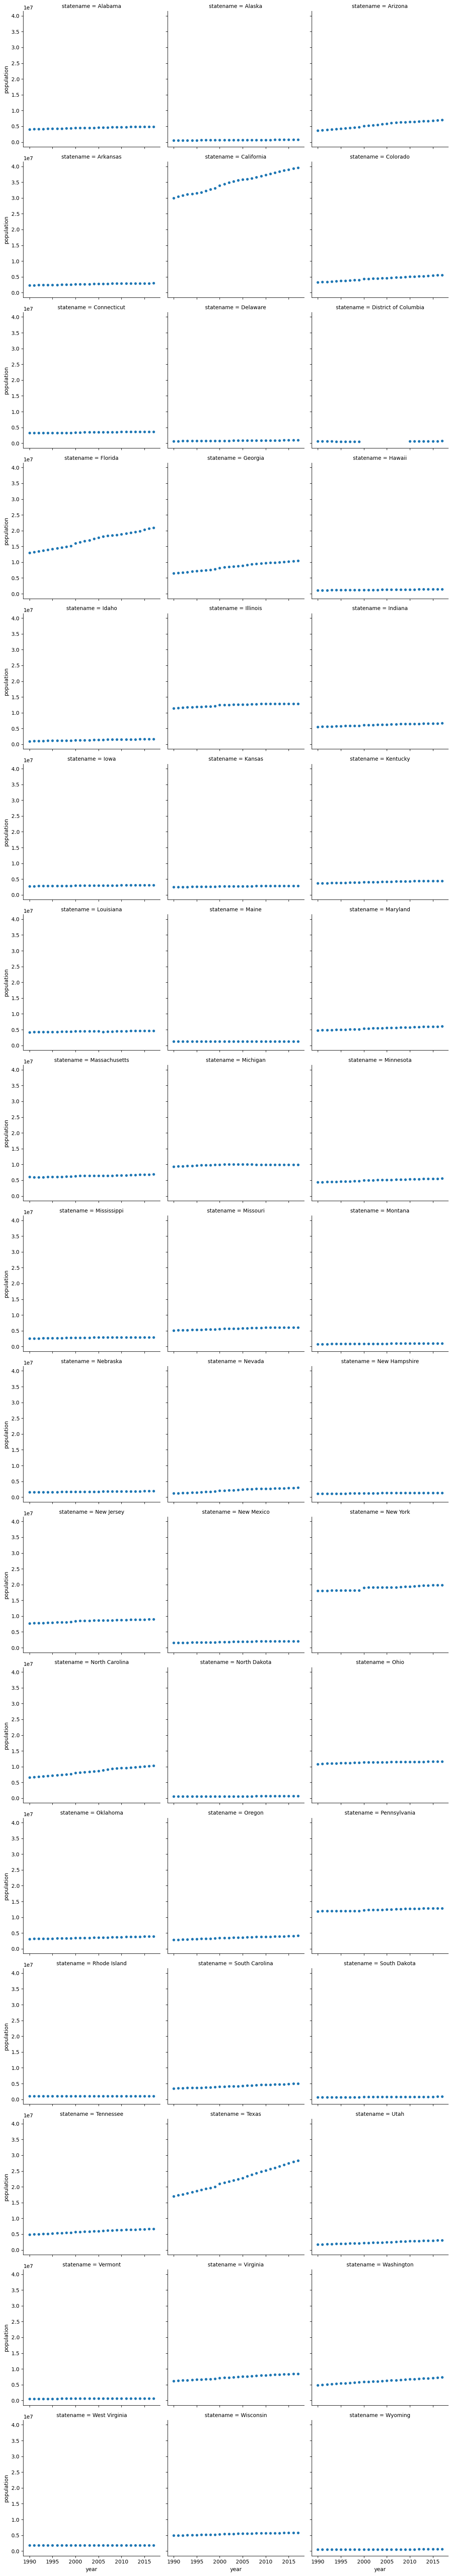

In [368]:
g = sns.FacetGrid(df_popl, col="statename", col_wrap=3, height=4)
g = (g.map(plt.scatter, "year", "population", edgecolor="w").add_legend()) # "year" would be on the x axis and "perc_gun" would be on the y axis
for ax in g.axes.flat:
    # ax.set_ylim([0,1])  # set the range for the y axis
    ax.xaxis.set_major_locator(plt.AutoLocator())
    _ = plt.setp(ax.get_xticklabels(), visible=True) # in order to keep track of which group we are referring to
    _ = plt.setp(ax.get_yticklabels(), visible=True)
plt.show() # show the figure inline

## Make Law Variable Panel

In [486]:
df_law = pd.read_excel('../Data/SYG/law.xlsx', usecols="D:E", nrows=50, sheet_name='Sheet1')

In [491]:
df_law = df_law.loc[np.repeat(df_law.index.values, 15)].reset_index(drop=True)

In [569]:
df_law = df_law.rename(columns={'State.1': 'State', 'Date.1': 'Law Passing Date'})

In [507]:
ar_year = df_law.groupby('State.1').cumcount()+2000

In [515]:
df_law.insert(1, 'Year', ar_year)

In [554]:
df_law['Date'] = pd.to_datetime((df_law['Year']), format='%Y')

In [553]:
df_law['Date Next Year'] = pd.to_datetime((df_law['Year']+1), format='%Y')

In [556]:
conditions = [
    df_law['Year'] < df_law['Date.1'].dt.year,
    df_law['Year'] == df_law['Date.1'].dt.year,
    df_law['Year'] > df_law['Date.1'].dt.year
]
values = [
    0,
    (df_law['Date Next Year'] - df_law['Date.1']).dt.days/ \
    (df_law['Date Next Year'] - df_law['Date']).dt.days,
    1
]
df_law['Law'] = np.select(conditions, values)

In [561]:
df_law['Law'] = df_law['Law'].round(2)

In [567]:
df_law = df_law.drop(['Date', 'Date Next Year'], axis=1)

In [586]:
df_law

,State,Year,Law Passing Date,Law,Prelaw
0,Alabama,2000,2006-06-01,0.0,0
1,Alabama,2001,2006-06-01,0.0,0
2,Alabama,2002,2006-06-01,0.0,0
3,Alabama,2003,2006-06-01,0.0,0
4,Alabama,2004,2006-06-01,0.0,1
...,...,...,...,...,...
745,Wyoming,2010,2018-07-01,0.0,0
746,Wyoming,2011,2018-07-01,0.0,0
747,Wyoming,2012,2018-07-01,0.0,0
748,Wyoming,2013,2018-07-01,0.0,0


In [585]:
df_law['Prelaw'] = np.where(((df_law['Law Passing Date'].dt.year - df_law['Year'])==1) | \
                            ((df_law['Law Passing Date'].dt.year - df_law['Year'])==2), 1, 0)

In [587]:
df_law['Around Law Year'] = np.where(
    ((df_law['Law Passing Date'].dt.year - df_law['Year'])==1) | \
    ((df_law['Law Passing Date'].dt.year - df_law['Year'])==0) | \
    ((df_law['Law Passing Date'].dt.year - df_law['Year'])==-1), 1, 0)

In [601]:
df_law = df_law.drop('Law Passing Date', axis=1)

In [595]:
df_law['Cum Law'] = df_law.groupby('State')['Law'].cumsum()

In [605]:
df_law.to_stata('../Data/SYG/law.dta', write_index=False)

C:\Users\liang\Anaconda3\lib\site-packages\pandas\io\stata.py:2347: InvalidColumnName:


Not all pandas column names were valid Stata variable names.
The following replacements have been made:

    Around Law Year   ->   Around_Law_Year
    Cum Law   ->   Cum_Law

If this is not what you expect, please make sure you have Stata-compliant
column names in your DataFrame (strings only, max 32 characters, only
alphanumerics and underscores, no Stata reserved words)




## Construct Panel of State Government Finances (2000-2014)

In [221]:
df_gov_spd = pd.DataFrame(columns = ['Gov ID', 'Item', 'Amount', 'Year'])
for i in range(2000, 2015):
    file_name = "../Data/Census Bureau/" + str(i) + "state35.txt"
    # 2012 and 2013 have data mistakes?
    if (i == 2012) | (i == 2013):
        colspecs = [(0, 14), (14, 17), (17, 32), (34, 36)]
    else:
        colspecs = [(0, 14), (14, 17), (17, 29), (31, 33)]
    df = pd.read_fwf(file_name, colspecs = colspecs,
                    names = ['Gov ID', 'Item', 'Amount', 'Year'])
    df['Year'] = 2000 + df['Year']
    df_gov_spd = df_gov_spd.append(df)

,Gov ID,Item,Amount,Year
0,1000000000000,19H,1740552,2000
1,1000000000000,19T,1769177,2000
2,1000000000000,19X,957310,2000
3,1000000000000,21G,482950,2000
4,1000000000000,24G,497206,2000
...,...,...,...,...
14771,51000000000000,Z70,2356302,2014
14772,51000000000000,Z78,1725891,2014
14773,51000000000000,Z83,0,2014
14774,51000000000000,Z84,225259,2014


In [222]:
df_state_id = pd.read_excel('../Data/Census Bureau/government-ids.xls', 
                            sheet_name = 'Sheet1')

In [223]:
df_gov_spd = df_gov_spd.merge(df_state_id, how='left', left_on = 'Gov ID', right_on = 'ID Code') \
    .drop('ID Code', axis = 1)

In [224]:
df_gov_spd['Amount'] = df_gov_spd['Amount'].replace({'.': 0})

In [225]:
df_gov_spd['Amount'] = pd.to_numeric(df_gov_spd['Amount'])

In [232]:
df_gov_spd = df_gov_spd.drop('Gov ID', axis=1)

In [249]:
df_gov_spd['State'] = df_gov_spd['State'].str.strip(' ')

In [252]:
df_gov_spd = df_gov_spd[['State', 'Year', 'Item', 'Amount']]

In [267]:
df_gov_spd['Year'] = df_gov_spd['Year'].astype('int64')

In [280]:
df_gov_spd.to_stata('../Data/Census Bureau/state_expenditures.dta',
                    write_index=False)

### Make Police Spending Data

In [282]:
df_gov_spd = pd.read_stata('../Data/Census Bureau/state_expenditures.dta')

In [283]:
df_police_spd = df_gov_spd[df_gov_spd['Item'] == 'E62']

In [289]:
df_police_spd = df_police_spd.drop('Item', axis=1).reset_index(drop=True)

In [343]:
df_police_spd = df_police_spd[df_police_spd['State']!='']

In [344]:
df_police_spd

,State,Year,Amount
0,Alabama,2000,86908
1,Alaska,2000,47380
2,Arizona,2000,130244
3,Arkansas,2000,62660
4,California,2000,997883
...,...,...,...
756,Virginia,2014,318508
757,Washington,2014,234738
758,West Virginia,2014,72283
759,Wisconsin,2014,119536


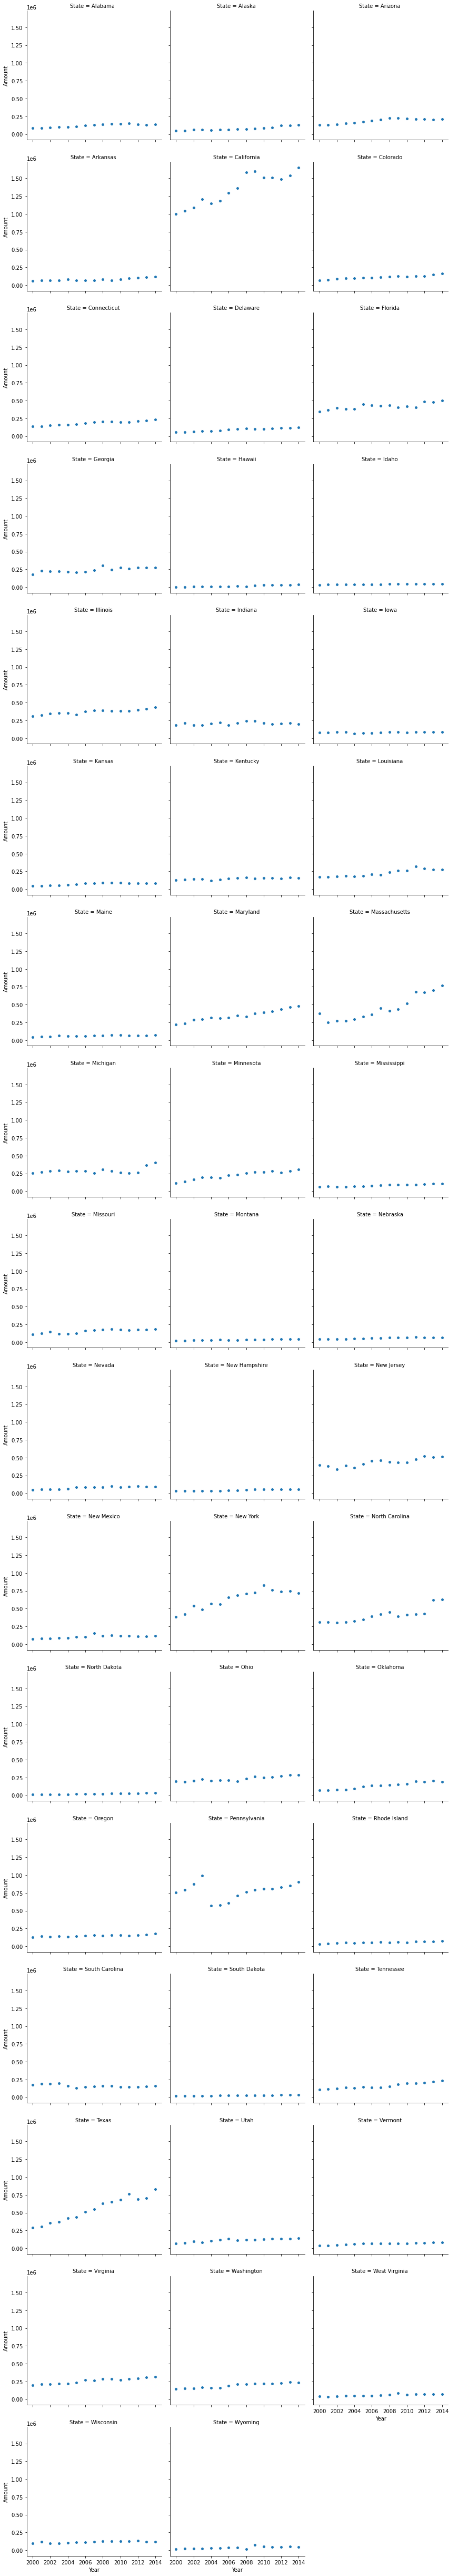

In [290]:
g = sns.FacetGrid(df_temp, col='State', col_wrap = 3, height = 4)
g = (g.map(plt.scatter, 'Year', 'Amount', edgecolor = 'w').add_legend())
for ax in g.axes.flat:
    # ax.set_ylim([0, 1])
    # ax.xaxis.set_major_locator(plt.AutoLocator())
    _ = plt.setp(ax.get_xticklabels(), visible = True)
    _ = plt.setp(ax.get_yticklabels(), visible = True)
plt.show()

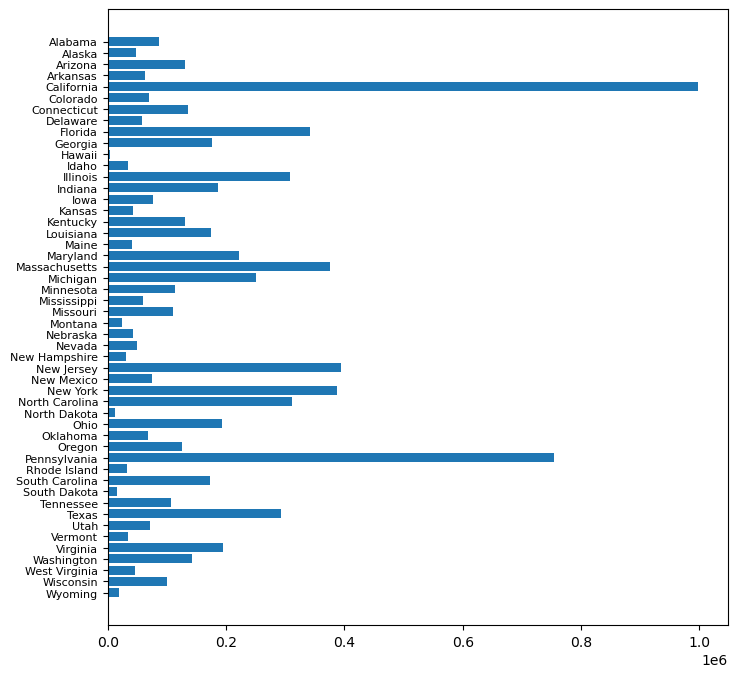

In [401]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(8, 8))
states = df_police['State'][0:50]
amount = df_police['Amount'][0:50]
ax.barh(states, amount)
ax.invert_yaxis()
plt.yticks(fontsize=8)
plt.show();

In [350]:
df_police_spd = df_police_spd.merge(df_popl, left_on=['State', 'Year'], 
                                    right_on=['statename', 'year'], how='left') \
                    .drop(['statename', 'year'], axis=1)

In [352]:
df_police_spd['Police Spending Per Capita'] = df_police_spd['Amount']/df_police_spd['population']

In [360]:
df_police_spd = df_police_spd.rename({'Amount': 'Police Spending'}, axis=1)

In [363]:
df_police_spd = df_police_spd.drop('population', axis=1)

In [364]:
df_police_spd

,State,Year,Police Spending,Police Spending Per Capita
0,Alabama,2000,86908,0.019520
1,Alaska,2000,47380,0.075450
2,Arizona,2000,130244,0.025238
3,Arkansas,2000,62660,0.023393
4,California,2000,997883,0.029360
...,...,...,...,...
745,Virginia,2014,318508,0.038296
746,Washington,2014,234738,0.033311
747,West Virginia,2014,72283,0.039122
748,Wisconsin,2014,119536,0.020784


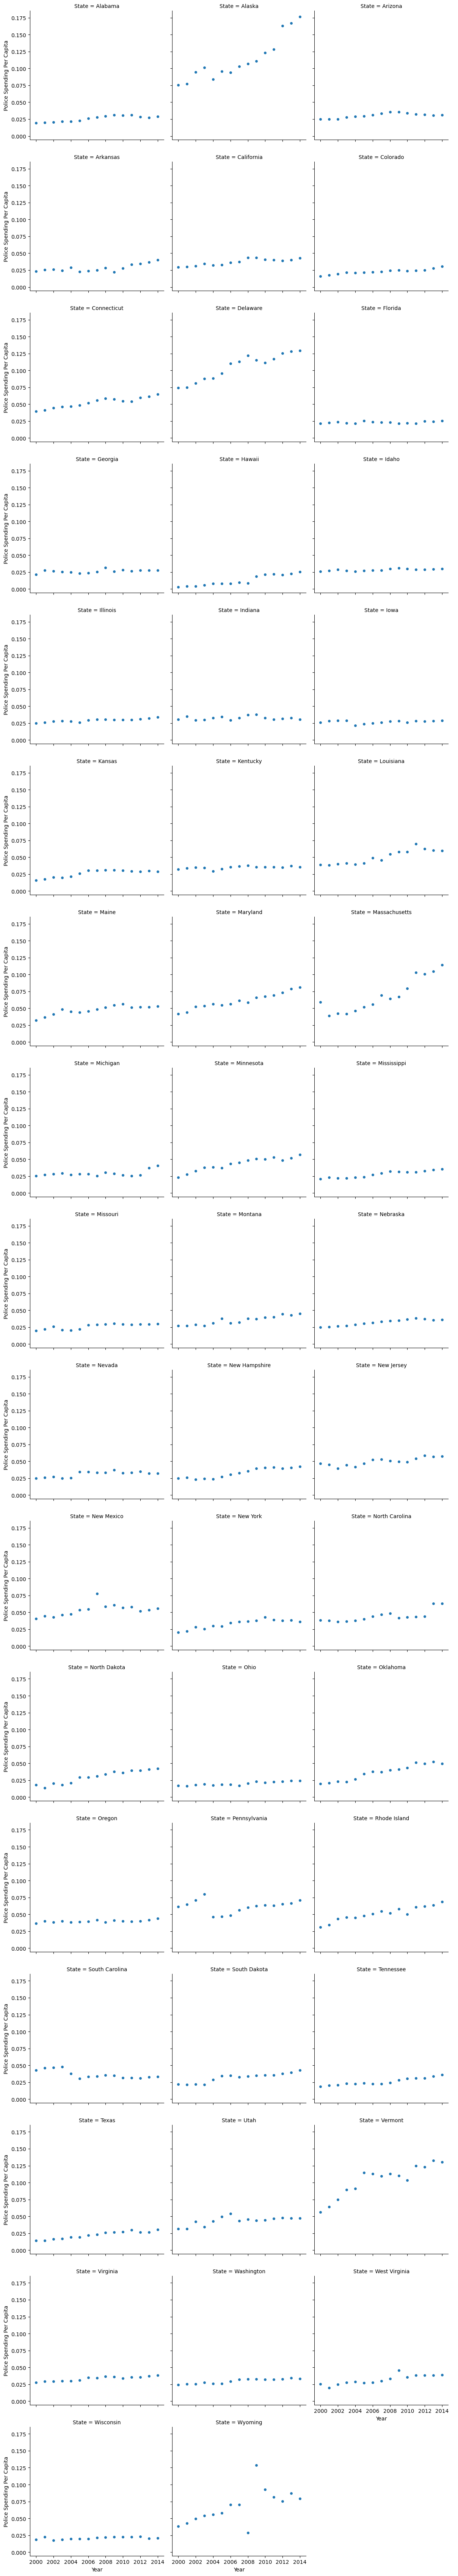

In [365]:
g = sns.FacetGrid(df_police_spd, col='State', col_wrap = 3, height = 4)
g = (g.map(plt.scatter, 'Year', 'Police Spending Per Capita', edgecolor = 'w').add_legend())
for ax in g.axes.flat:
    # ax.set_ylim([0, 1])
    # ax.xaxis.set_major_locator(plt.AutoLocator())
    _ = plt.setp(ax.get_xticklabels(), visible = True)
    _ = plt.setp(ax.get_yticklabels(), visible = True)
plt.show()

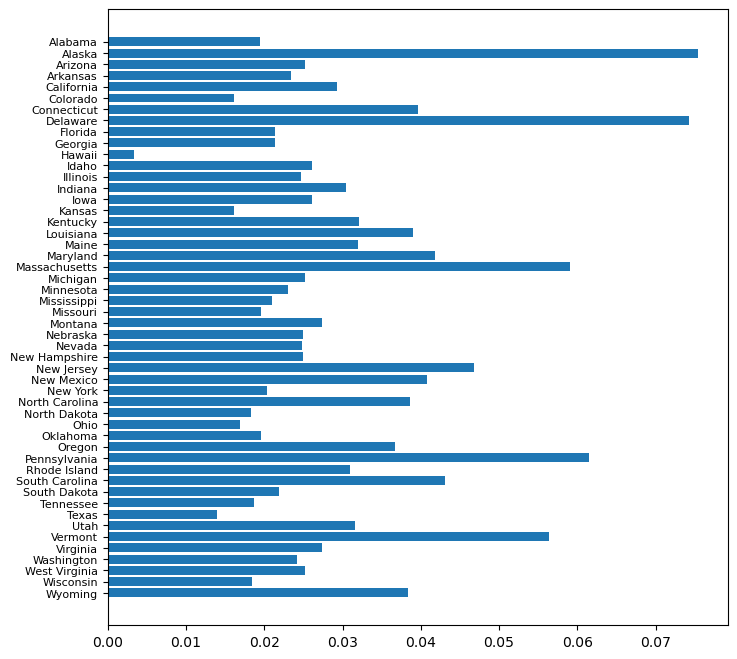

In [393]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(8, 8))
states = df_police_spd['State'][:50]
amount = df_police_spd['Police Spending Per Capita'][:50]
ax.barh(states, amount) # if horizontal bar
ax.invert_yaxis() # labels read top-to-bottom
plt.yticks(fontsize=8)
plt.show();

In [404]:
df_police_spd.to_stata('../Data/Census Bureau/police.dta', 
                       write_index=False)

C:\Users\liang\Anaconda3\lib\site-packages\pandas\io\stata.py:2347: InvalidColumnName:


Not all pandas column names were valid Stata variable names.
The following replacements have been made:

    Police Spending   ->   Police_Spending
    Police Spending Per Capita   ->   Police_Spending_Per_Capita

If this is not what you expect, please make sure you have Stata-compliant
column names in your DataFrame (strings only, max 32 characters, only
alphanumerics and underscores, no Stata reserved words)




# Constructing Panel
Process of constructing the dataset for analysis from existing data.

## Import Murder Statistics

In [620]:
df_murder_rate = pd.read_excel('../Data/UCR/OKCA/murder.xlsx', sheet_name = 'Sheet1')

## Merge with First and Second Degree Murder Data

## Merge with Law Variable

In [622]:
df_law = pd.read_stata('../Data/SYG/law.dta')

In [610]:
df_law

,State,Year,Law,Prelaw,Around_Law_Year,Cum_Law
0,Alabama,2000,0.0,0,0,0.0
1,Alabama,2001,0.0,0,0,0.0
2,Alabama,2002,0.0,0,0,0.0
3,Alabama,2003,0.0,0,0,0.0
4,Alabama,2004,0.0,1,0,0.0
...,...,...,...,...,...,...
745,Wyoming,2010,0.0,0,0,0.0
746,Wyoming,2011,0.0,0,0,0.0
747,Wyoming,2012,0.0,0,0,0.0
748,Wyoming,2013,0.0,0,0,0.0


In [633]:
df_syg_murder = df_murder_rate.merge(df_law, left_on=['statename', 'year'], 
                                    right_on=['State', 'Year'], how='left')

In [634]:
df_syg_murder = df_syg_murder.drop(['State', 'Year'], axis=1)

## Merge with Percent Population Born Abroad

In [72]:
df_perc_foreign = pd.read_stata('../Data/ACS/foreign.dta')

In [73]:
df_perc_foreign = df_perc_foreign.astype({'year': 'int64'})

In [635]:
df_syg_murder = df_syg_murder.merge(df_perc_foreign, on = ['year', 'statename'])

## Merge with Demographic Variables

In [686]:
df_dem = pd.read_stata("../Data/ACS/ethnic_makeup.dta")

In [689]:
df_dem['year'] = df_dem['year'].astype("int64")

In [692]:
df_syg_murder = df_syg_murder.merge(df_dem, on=['statename', 'year'], how="left")

## Merge with Educational Level Data

In [41]:
df_avg_educ = pd.read_stata('../Data/ACS/educ.dta')

In [48]:
df_avg_educ = df_avg_educ.astype({'year': 'int64'})

In [637]:
df_syg_murder = df_syg_murder.merge(df_avg_educ, on = ['year', 'statename'])

In [638]:
df_syg_murder = df_syg_murder.rename({'groupmean': 'educ'}, axis = 1)

## Merge with Employment Rate Data

In [52]:
df_avg_empl = pd.read_stata('../Data/ACS/empl.dta')

In [56]:
df_avg_empl = df_avg_empl.astype({'year': 'int64'})

In [640]:
df_syg_murder = df_syg_murder.merge(df_avg_empl, on = ['year', 'statename'])

In [642]:
df_syg_murder = df_syg_murder.rename({'empstat': 'emprate'}, axis = 1)

## Merge with Unemployment Rate Data

In [669]:
df_unempl = pd.read_stata("../Data/ACS/unemployrt.dta")

In [671]:
df_unempl['year'] = df_unempl['year'].astype("int64")

In [674]:
df_syg_murder = df_syg_murder.merge(df_unempl, on=['statename', 'year'], how="left")

## Merge with Median Family Income Data

In [675]:
df_fam_inc = pd.read_stata("../Data/ACS/median_hh_income.dta")

In [679]:
df_fam_inc['year'] = df_fam_inc['year'].astype("int64")

In [683]:
df_syg_murder = df_syg_murder.merge(df_fam_inc, on=['statename', 'year'], how="left")

In [685]:
df_syg_murder = df_syg_murder.rename({"wtmedian": "med_hh_income"}, axis=1)

## Merge with Mean Wage Data

In [66]:
df_wage = pd.read_stata('../Data/ACS/wage.dta')

In [69]:
df_wage = df_wage.astype({'year': 'int64'})

In [644]:
df_syg_murder = df_syg_murder.merge(df_wage, on = ['year', 'statename'])

In [645]:
df_syg_murder = df_syg_murder.rename({'groupmean': 'wage'}, axis = 1)

## Merge with Poverty Data

In [702]:
df_poverty = pd.read_stata("../Data/ACS/poverty.dta")

In [706]:
df_poverty['year'] = df_poverty['year'].astype("int64")

In [708]:
df_syg_murder = df_syg_murder.merge(df_poverty, on=['statename', 'year'], how="left")

## Merge with Public Assistance Data

In [710]:
df_assist = pd.read_stata("../Data/Census Bureau/assistance.dta")

In [713]:
df_assist['year'] = df_assist['year'].astype("int64")

In [717]:
df_syg_murder = df_syg_murder.merge(df_assist, on=['statename', 'year'], how="left")

## Merge with Welfare Data

In [719]:
df_welfare = pd.read_stata("../Data/Census Bureau/welfare.dta")

In [722]:
df_syg_murder = df_syg_murder.merge(df_welfare, on=['statename', 'year'], how="left")

## Merge with Gini Coefficient Data

In [420]:
df_gini = pd.read_stata('../Data/SHSU/Frank_Gini_2015.dta')

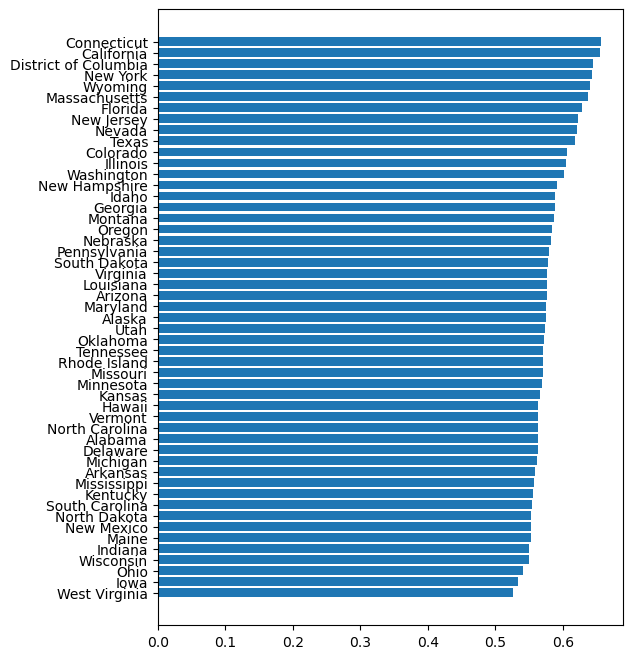

In [446]:
# Plot state Gini coefficients from highest to lowest (2000)
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(6, 8))
df = df_gini[['State', 'Gini']][4233:4284].sort_values('Gini', ascending=False)
ax.barh(df['State'], df['Gini']) # if horizontal bar
ax.invert_yaxis() # labels read top-to-bottom
plt.show();

In [431]:
df_syg_murder = df_syg_murder.merge(df_gini, left_on=['year', 'statename'],
                    right_on=['Year', 'State'])

In [447]:
df_syg_murder = df_syg_murder.drop(['Year', 'st', 'State', 'Atkin05', 'RMeanDev', 'Theil'], axis=1)

,year,statename,murderrate,property crime,burglary,larceny,vehicle,foreign,educ,empstat,wage,Police_Spending,Police_Spending_Per_Capita,Gini
0,2000,Alabama,7.4,4059.7,906.9,2864.8,288.0,0.030368,10.071167,0.449341,28394.371094,86908,0.019520,0.562732
1,2001,Alabama,8.5,3876.8,909.4,2685.0,282.4,0.025885,10.181910,0.435727,30269.650391,88192,0.019740,0.556968
2,2002,Alabama,6.8,4027.8,950.6,2767.0,310.1,0.030866,10.293612,0.439362,31721.652344,92292,0.020600,0.560690
3,2003,Alabama,6.6,4046.4,960.2,2754.1,332.1,0.031036,10.352322,0.437660,31518.291016,97253,0.021595,0.581490
4,2004,Alabama,5.6,4029.3,987.0,2732.4,309.9,0.030170,10.461323,0.442741,32778.753906,97400,0.021498,0.606340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2010,Wyoming,1.4,2456.6,381.0,1970.8,104.9,0.035808,10.878962,0.488877,38825.792969,52245,0.092571,0.655814
746,2011,Wyoming,3.2,2269.8,328.5,1849.5,91.8,0.035649,10.963169,0.498620,37912.453125,46128,0.081268,0.628932
747,2012,Wyoming,2.4,2293.0,368.5,1823.2,101.3,0.038613,10.984686,0.486264,37941.453125,43448,0.075351,0.651374
748,2013,Wyoming,2.9,2196.2,335.4,1761.8,99.1,0.037902,11.053942,0.491764,41017.894531,50615,0.086916,0.666165


## Merge with Police Spending Data

In [405]:
df_police_spd = pd.read_stata('../Data/Census Bureau/police.dta')

In [647]:
df_syg_murder = df_syg_murder.merge(df_police_spd, left_on = ['year', 'statename']
                                    , right_on=['Year', 'State'])

In [649]:
df_syg_murder = df_syg_murder.drop(['Year', 'State', 'Police_Spending'], axis=1)

## Merge with Size of the Police Force Data

In [651]:
df_police = pd.read_stata("../Data/UCR/LEOKA/leoka.dta")

In [654]:
df_police = df_police.rename({'perc_police': 'Police'}, axis=1)

In [657]:
df_police['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016], dtype=int16)

In [659]:
df_syg_murder = df_syg_murder.merge(df_police, on=['statename', 'year'], how="left")

## Merge with Prisoner Data

In [696]:
df_prisoners = pd.read_stata("../Data/UCR/Prisoners/prisoners.dta")

In [701]:
df_syg_murder = df_syg_murder.merge(df_prisoners, on=['statename', 'year'], how="left")

## Merge with Gun Ownership Data

In [739]:
df_gun = pd.read_csv("../Data/CDC/psg.csv")

In [743]:
df_syg_murder = df_syg_murder.merge(df_gun, left_on=['statename', 'year'], 
                                    right_on=['State', 'Year'], how="left")

## Summary statistics

### UCR

In [1]:
df = pd.read_stata('murder.dta')

In [2]:
df.head()

,statename,year,murderrate,law,cum_law,prelaw,law_year,law_b_year,law_a_year,population,...,prisoner,lagprisoner,poverty,assistance,welfare,perc_gun,northeast,midwest,south,west
0,Alabama,2000.0,7.40,0.0,0.0,0.0,0.0,0.0,0.0,4452173.0,...,591.441528,564.274109,0.160345,163.112488,1244.188477,0.732824,0,0,1,0
1,Alabama,2001.0,8.48,0.0,0.0,0.0,0.0,0.0,0.0,4467634.0,...,598.549500,591.441528,0.167812,175.457977,1441.422241,0.756522,0,0,1,0
2,Alabama,2002.0,6.77,0.0,0.0,0.0,0.0,0.0,0.0,4480089.0,...,623.804565,598.549500,0.169961,207.409958,1545.905273,0.739130,0,0,1,0
3,Alabama,2003.0,6.64,0.0,0.0,0.0,0.0,0.0,0.0,4503491.0,...,619.808044,623.804565,0.173728,222.626617,1682.475464,0.767241,0,0,1,0
4,Alabama,2004.0,5.61,0.0,0.0,1.0,0.0,0.0,0.0,4530729.0,...,571.364990,619.808044,0.164256,223.650787,1696.838745,0.697479,0,0,1,0


In [6]:
df.columns

Index(['statename', 'year', 'murderrate', 'law', 'cum_law', 'prelaw',
       'law_year', 'law_b_year', 'law_a_year', 'population', 'perc_police',
       'unemployrt', 'income', 'per_wm15', 'per_bm15', 'per_wm25', 'per_bm25',
       'prisoner', 'lagprisoner', 'poverty', 'assistance', 'welfare',
       'perc_gun', 'northeast', 'midwest', 'south', 'west'],
      dtype='object')

In [3]:
df['murderrate'].describe()

count    850.000000
mean       4.569104
std        2.313359
min        0.620000
25%        2.612500
50%        4.485000
75%        6.110000
max       14.560000
Name: murderrate, dtype: float64

In [39]:
df.loc[df['murderrate'] == 14.56]

,statename,year,murderrate,law,cum_law,prelaw,law_year,law_b_year,law_a_year,population,...,prisoner,lagprisoner,poverty,assistance,welfare,perc_gun,northeast,midwest,south,west
296,Louisiana,2007.0,14.56,1.0,1.381,0.0,0.0,0.0,1.0,4375581.0,...,857.943237,860.21106,0.210682,128.4328,2151.595947,0.647059,0,0,1,0


In [40]:
df.loc[df['murderrate'] == .62]

,statename,year,murderrate,law,cum_law,prelaw,law_year,law_b_year,law_a_year,population,...,prisoner,lagprisoner,poverty,assistance,welfare,perc_gun,northeast,midwest,south,west
561,North Dakota,2000.0,0.62,0.0,0.0,0.0,0.0,0.0,0.0,642023.0,...,167.595245,148.816574,0.128909,46.398651,1454.504028,0.518868,0,1,0,0


### SHR Count

In [13]:
shr_all = pd.read_stata('../Data/SHR/shr_murder.dta')

In [14]:
shr_all.columns

Index(['statename', 'year', 'murdershr', 'negligent', 'justifiable',
       'unknown'],
      dtype='object')

In [15]:
shr_all['murdershr'].describe()

count     838.000000
mean      175.587112
std       251.820175
min         1.000000
25%        27.000000
50%       100.500000
75%       216.750000
max      1901.000000
Name: murdershr, dtype: float64

### SHR Count by Planned vs Unplanned

In [16]:
shr_separate = pd.read_stata('../Data/SHR/shr_planned.dta')

In [17]:
shr_separate.columns

Index(['statename', 'year', 'murderp', 'murderup', 'murdernh'], dtype='object')

In [29]:
# sum planned and unplanned murders
shr_separate['murder_total'] = shr_separate.iloc[:, 2:4].sum(axis=1)

In [30]:
shr_separate.head()

,statename,year,murderp,murderup,murdernh,murder_total
0,Alabama,2000,178.324600,40.719620,3.940469,219.044220
1,Alabama,2001,266.861938,52.331917,3.316782,319.193848
2,Alabama,2002,230.000137,44.270290,2.670468,274.270416
3,Alabama,2003,234.683472,45.155495,2.694036,279.838959
4,Alabama,2004,202.145950,39.684750,2.473655,241.830704


In [18]:
shr_separate[['murderp', 'murderup']].describe()

,murderp,murderup
count,838.000000,838.000000
mean,223.995438,50.220573
std,295.509705,60.804630
min,2.200086,0.365347
25%,32.626710,7.881889
50%,126.801662,30.068158
75%,323.744194,68.586786
max,2026.510986,388.285278


### SHR by percentage

In [9]:
shr = pd.read_stata('../Data/SHR/shr.dta')

In [36]:
shr['Murder Total'] = shr.iloc[:, 3:5].sum(axis=1)

In [37]:
shr.head()

,statename,year,mur_shr_r,mur_up_r,mur_p_r,mur_nh_r,neg_r,just_r,Murder Total
0,Alabama,2000,2.717774,0.914601,4.005339,0.088507,0.022461,0.022461,4.919940
1,Alabama,2001,2.708369,1.171356,5.973228,0.074240,NaN,0.044766,7.144584
2,Alabama,2002,2.232099,0.988156,5.133830,0.059607,NaN,0.111605,6.121986
3,Alabama,2003,2.020655,1.002678,5.211145,0.059821,NaN,0.066615,6.213823
4,Alabama,2004,1.809863,0.875902,4.461665,0.054597,0.022072,0.066215,5.337567


In [38]:
shr[['mur_up_r', 'mur_p_r', 'Murder Total']].describe()

,mur_up_r,mur_p_r,Murder Total
count,838.000000,838.000000,838.000000
mean,0.742390,3.179876,3.922271
std,0.372313,1.710005,2.067838
min,0.055560,0.342680,0.411030
25%,0.434618,1.744886,2.182838
50%,0.688780,3.021711,3.705620
75%,1.008763,4.349590,5.357669
max,2.306614,10.310464,12.349393


In [45]:
shr.loc[shr['mur_up_r'] >= 2.306614]

,statename,year,mur_shr_r,mur_up_r,mur_p_r,mur_nh_r,neg_r,just_r,Murder Total
277,Louisiana,2000,9.973423,2.306614,7.956265,0.441467,0.178895,0.313067,10.262879


In [44]:
shr.loc[shr['mur_up_r'] <= .055561]

,statename,year,mur_shr_r,mur_up_r,mur_p_r,mur_nh_r,neg_r,just_r,Murder Total
557,North Dakota,2008,0.304151,0.05556,0.35547,0.01146,NaN,NaN,0.41103


In [46]:
shr.loc[shr['mur_p_r'] >= 10.310464]

,statename,year,mur_shr_r,mur_up_r,mur_p_r,mur_nh_r,neg_r,just_r,Murder Total
284,Louisiana,2007,5.302153,2.038929,10.310464,0.153704,0.205687,0.457082,12.349393


In [49]:
shr.loc[shr['mur_p_r'] <= 0.342681]

,statename,year,mur_shr_r,mur_up_r,mur_p_r,mur_nh_r,neg_r,just_r,Murder Total
549,North Dakota,2000,0.311515,0.104976,0.34268,0.009267,0.155758,NaN,0.447657


## Calculate the average murder rate for planned and unplanned murders

In [6]:
# Make dataframe
m = {'planned': [.101, .073, .062, .06, .09, .097, .059, .093, .09, .047, .067, .078],
          'unplanned': [.118, .095, .094, .092, .103, .114, .098, .119, .115, .09, .096, .11]}
murders = pd.DataFrame(data=m)

In [7]:
murders

,planned,unplanned
0,0.101,0.118
1,0.073,0.095
2,0.062,0.094
3,0.060,0.092
4,0.090,0.103
5,0.097,0.114
6,0.059,0.098
7,0.093,0.119
8,0.090,0.115
9,0.047,0.090


In [8]:
murders.mean()

planned      0.076417
unplanned    0.103667
dtype: float64

In [11]:
# Two-sample T-test
ttest_ind(murders['planned'], murders['unplanned'])

Ttest_indResult(statistic=-4.557237294624091, pvalue=0.00015467396258297722)

# Regressions

# Results
Show graphs and stats here

# Conclusions and Next Steps
Summarize findings here